# Vega Analysis for AMM Fee Mechanisms

This notebook analyzes the vega (volatility sensitivity) characteristics of AMM fee mechanisms, comparing ingoing and outgoing fee structures across different market conditions.

## 1. Vega Response Across Volatility Ranges

In [1]:
# Cell 1 - Initial setup
import sys
sys.path.append('/home/shiftpub/Dynamic_AMM/exp')
from vega_analysis import VegaAnalysis

analyzer = VegaAnalysis(show=True)

### 1.1 Low Volatility Range Analysis (σ ∈ [0.1, 1.0])
Examining vega behavior in low volatility conditions to understand fee sensitivity.

Ploting ingoing Vegas...


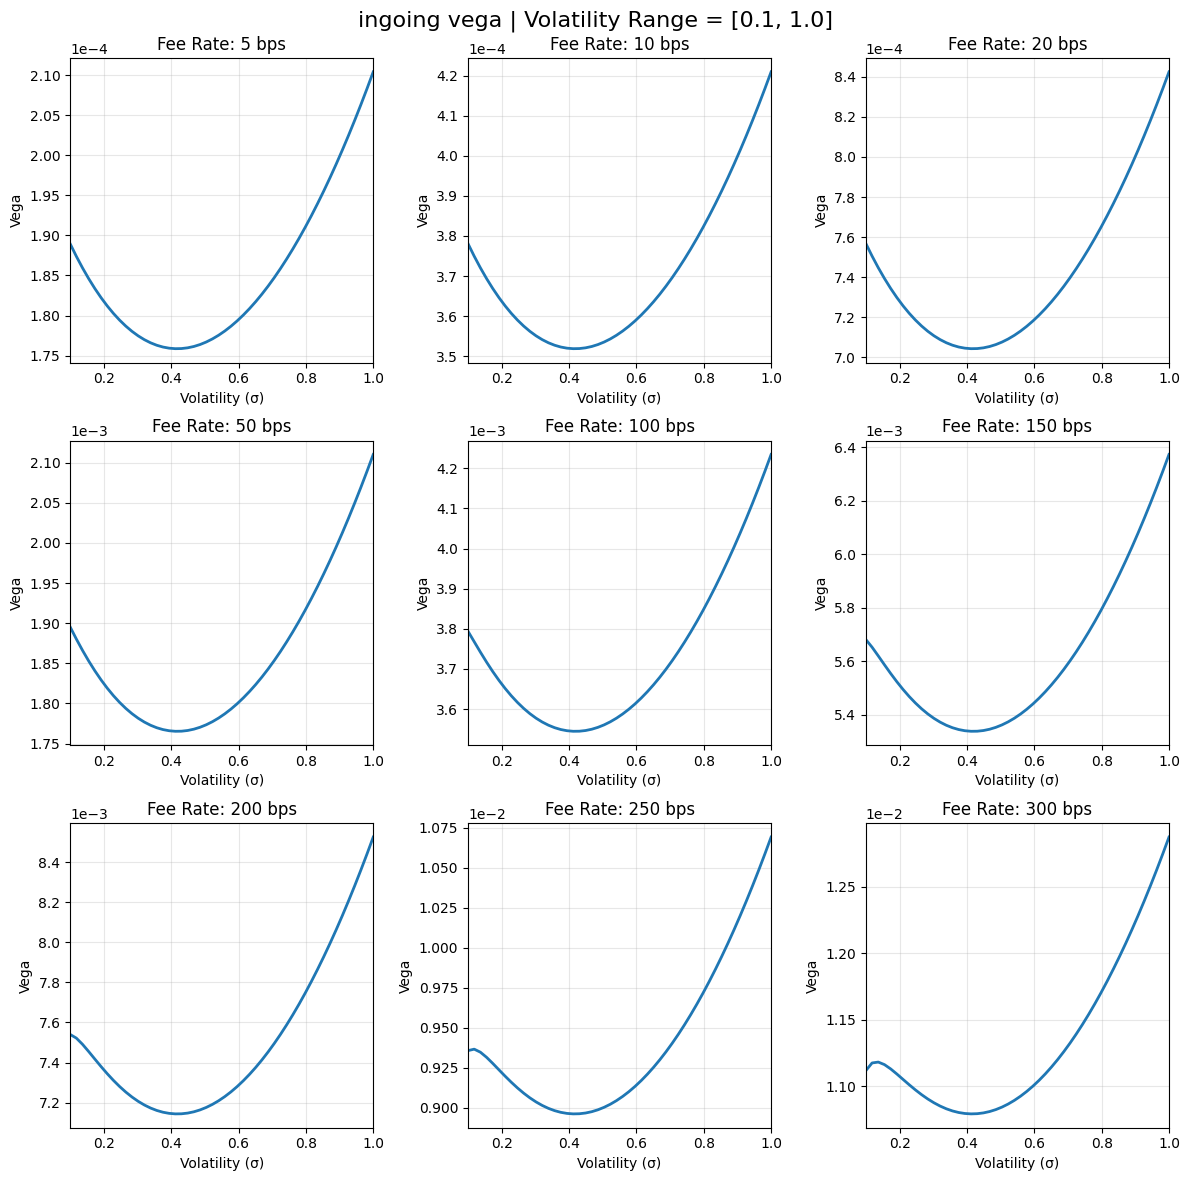

Ploting outgoing Vegas...


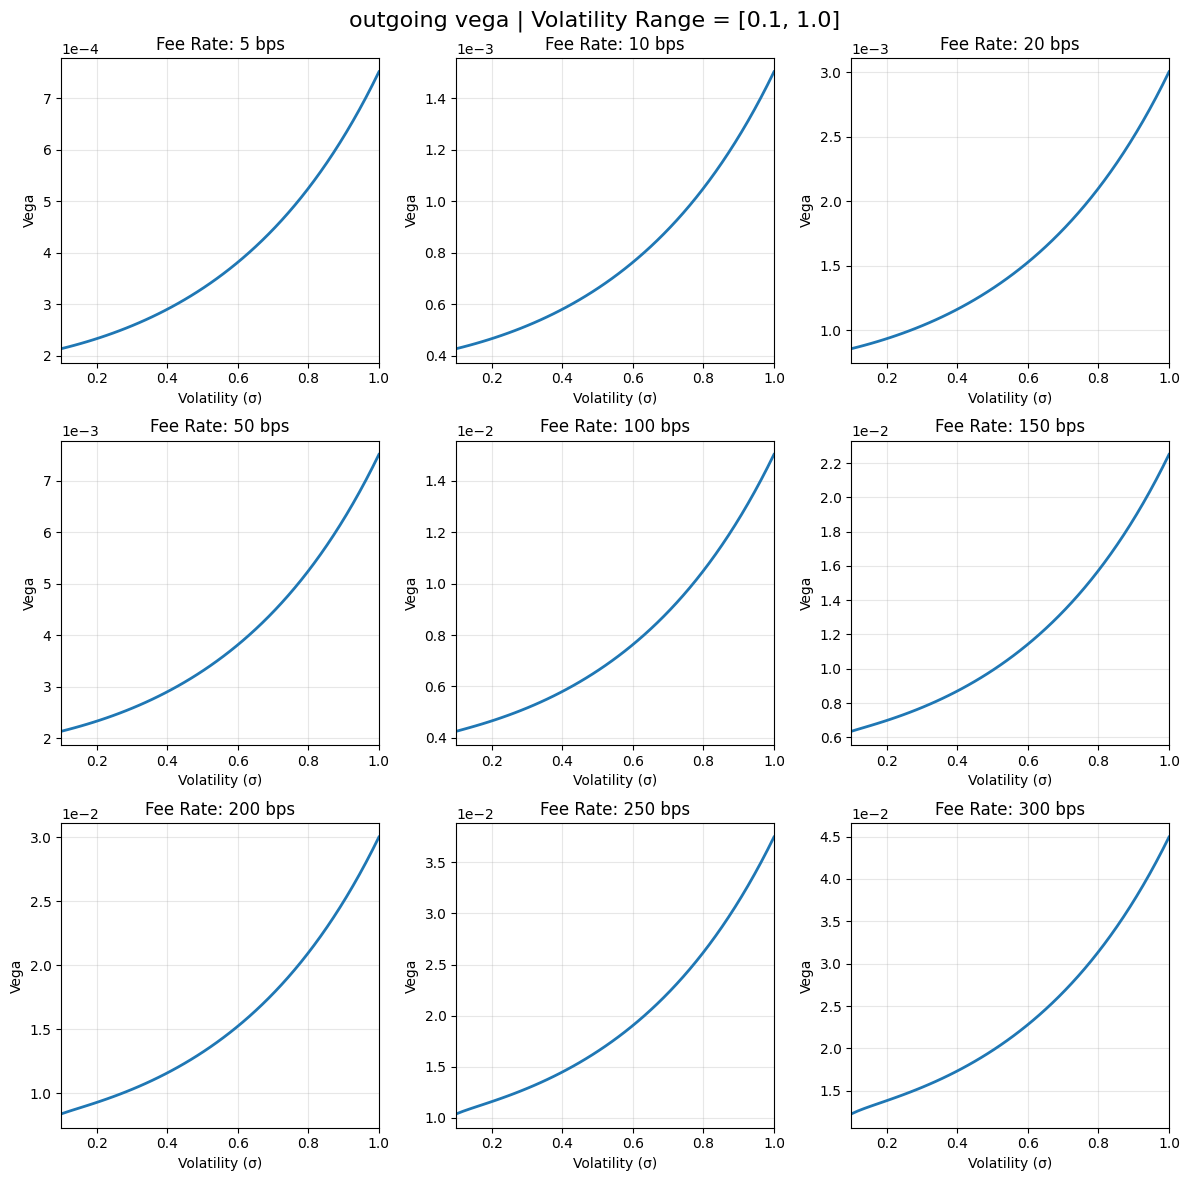

In [2]:
# Cell 2
analyzer.plot_vega_analysis(max_sigma=1.0, is_ingoing=True)
analyzer.plot_vega_analysis(max_sigma=1.0, is_ingoing=False)

### 1.2 Medium Volatility Range Analysis (σ ∈ [0.1, 5.0])
Exploring vega characteristics in moderate volatility environments.

Ploting ingoing Vegas...


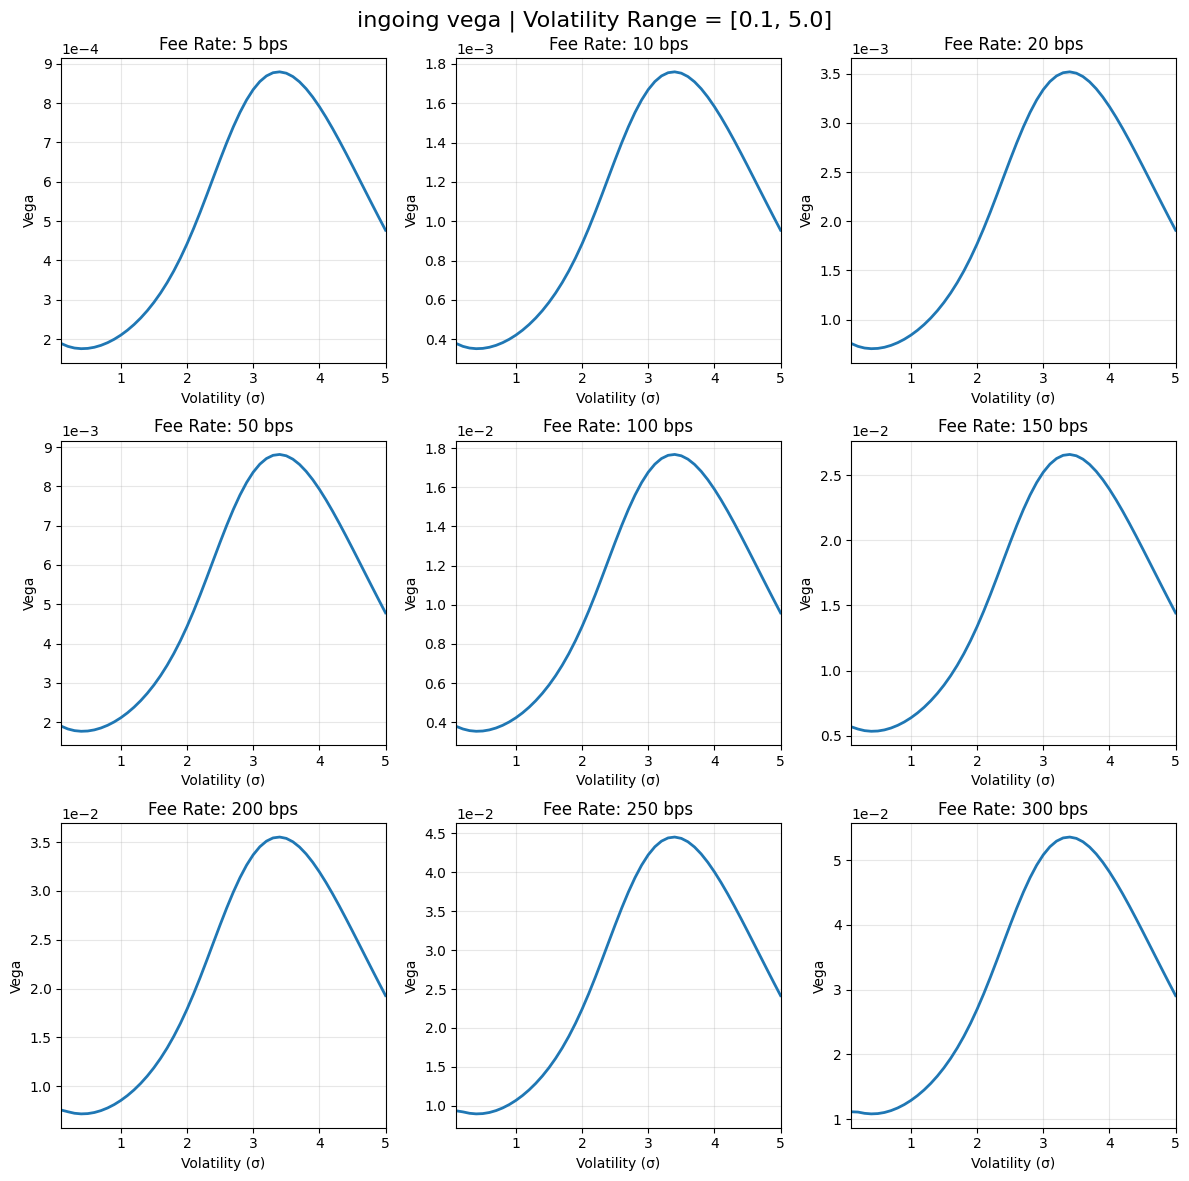

Ploting outgoing Vegas...


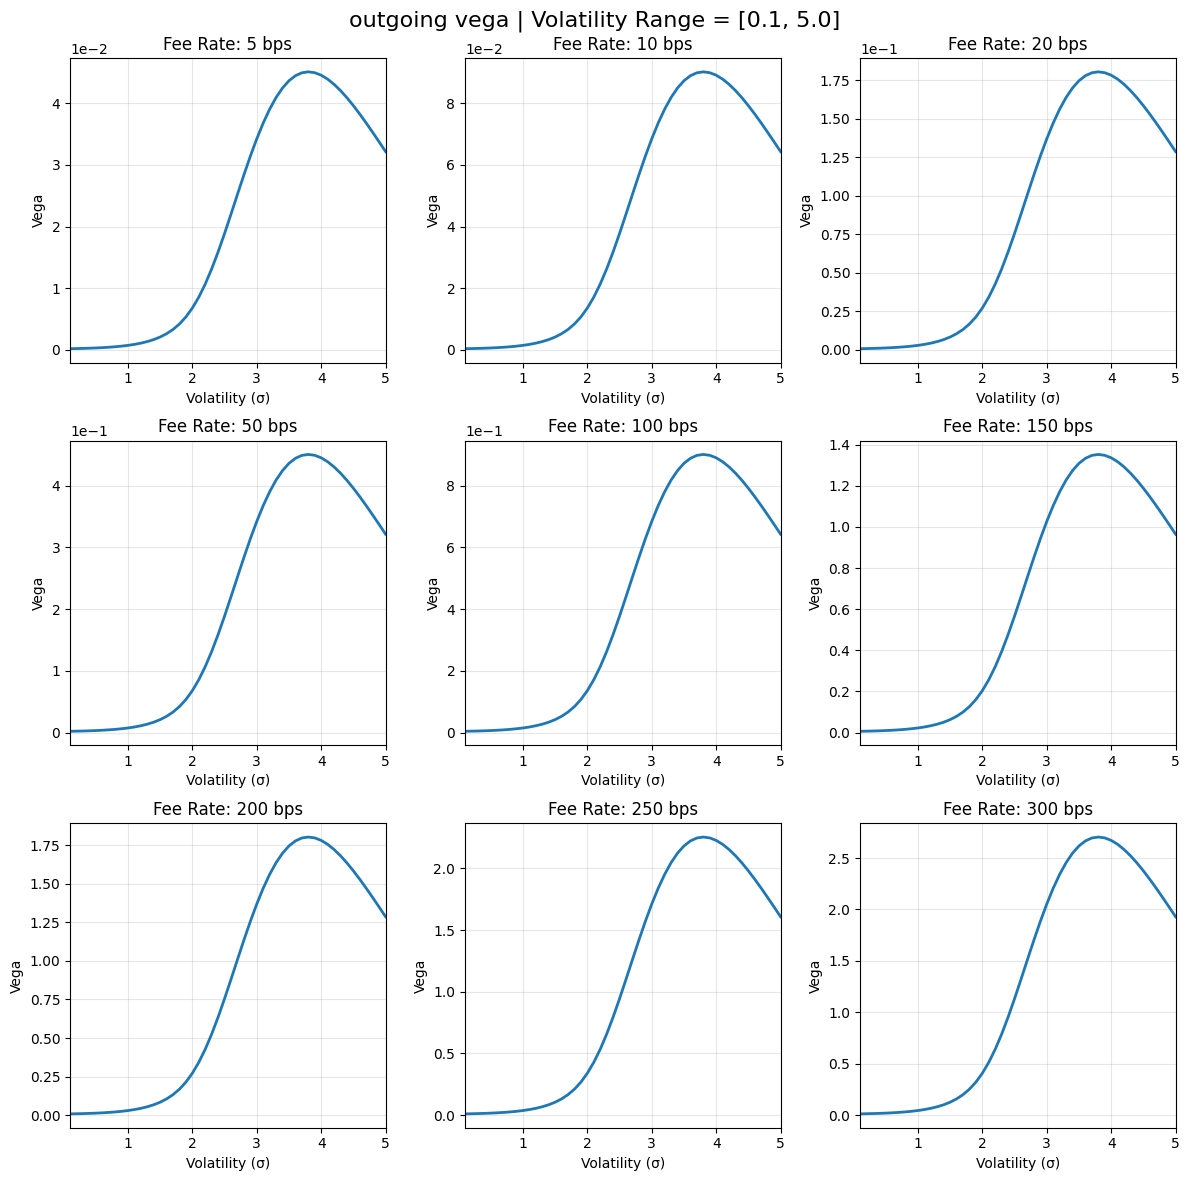

In [3]:
# Cell 3
analyzer.plot_vega_analysis(max_sigma=5.0, is_ingoing=True)
analyzer.plot_vega_analysis(max_sigma=5.0, is_ingoing=False)

### 1.3 High Volatility Range Analysis (σ ∈ [0.1, 10.0])
Understanding vega behavior under high volatility conditions.

Ploting ingoing Vegas...


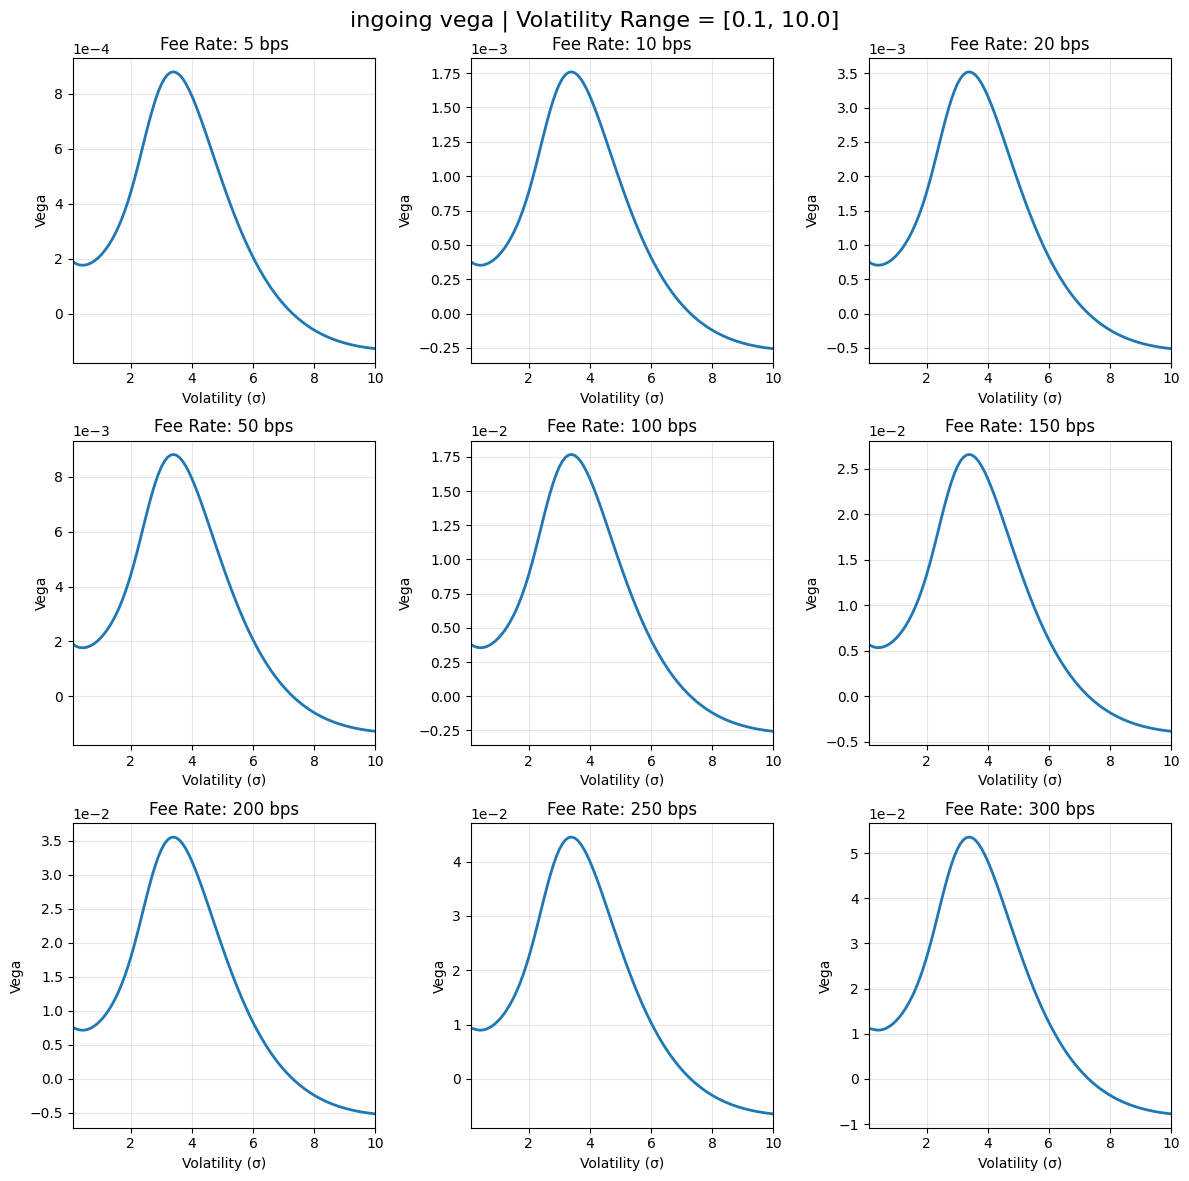

Ploting outgoing Vegas...


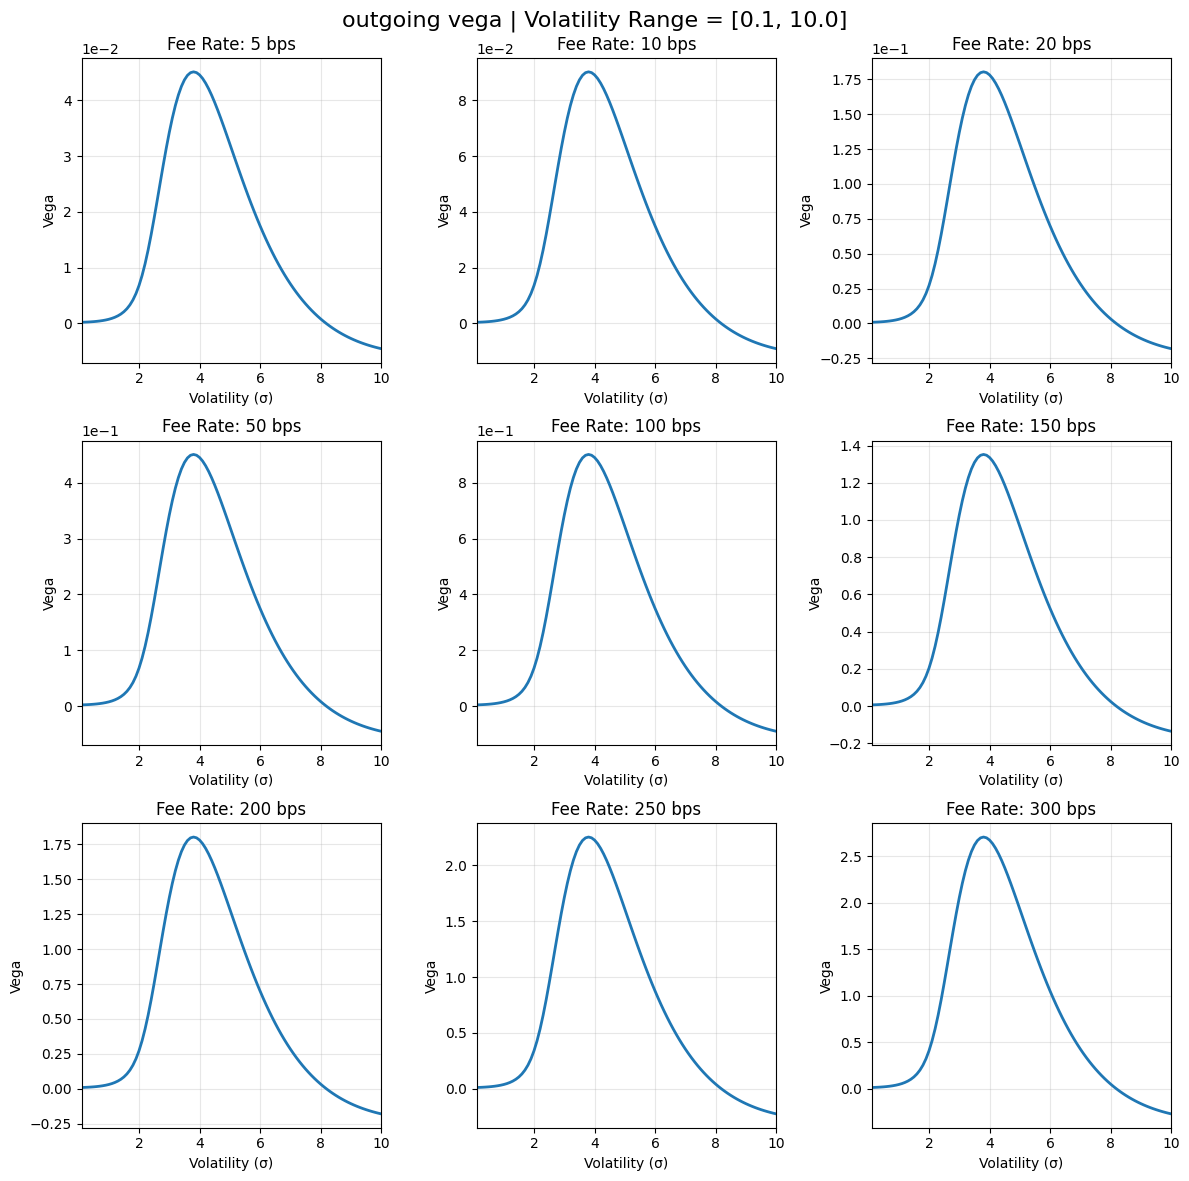

In [4]:
# Cell 4
analyzer.plot_vega_analysis(max_sigma=10.0, is_ingoing=True)
analyzer.plot_vega_analysis(max_sigma=10.0, is_ingoing=False)

## 2. Decomposition Analysis

In the vega calculation for both ingoing and outgoing fees, we can decompose the integrand into several components to understand their individual contributions:

### Price Effect Components

The price effect terms represent how fees impact the AMM's price curve:

- **Ingoing Fee Price Effect**: $\sqrt{\frac{1}{1-f}} \left( \sqrt{v} + \frac{1}{\sqrt{v}} \right) - \frac{v+1}{1-f}$
- **Outgoing Fee Price Effect**: $-\sqrt{\frac{1}{1-f}}\left(\sqrt{v} + \frac{1}{\sqrt{v}}\right) + \frac{v+1}{v}$

### Sensitivity Components

The vega calculation involves three key sensitivity-related components:

1. **Log-normal PDF** ($\phi(v)$):

2. **Sensitivity Term** ($\frac{(\ln v)^2}{\sigma^3} - \frac{1}{\sigma}$):

3. **Weighted Sensitivity**:
   - Combination of log-normal PDF and sensitivity term
   - Given by $\phi(v) \cdot \left(\frac{(\ln v)^2}{\sigma^3} - \frac{1}{\sigma} \right)$

The full vega is then calculated by integrating the product of these components with the price effect term and fee parameters ($f \cdot \ell_s$) over the domain [0, 1-f].


### 2.1 Price Effect Analysis
Examining how price movements contribute to vega through cumulative effects.
- **Ingoing Fee Price Effect**: $\sqrt{\frac{1}{1-f}} \left( \sqrt{v} + \frac{1}{\sqrt{v}} \right) - \frac{v+1}{1-f}$
- **Outgoing Fee Price Effect**: $-\sqrt{\frac{1}{1-f}}\left(\sqrt{v} + \frac{1}{\sqrt{v}}\right) + \frac{v+1}{v}$

Plotting ingoing price effect cumulative...


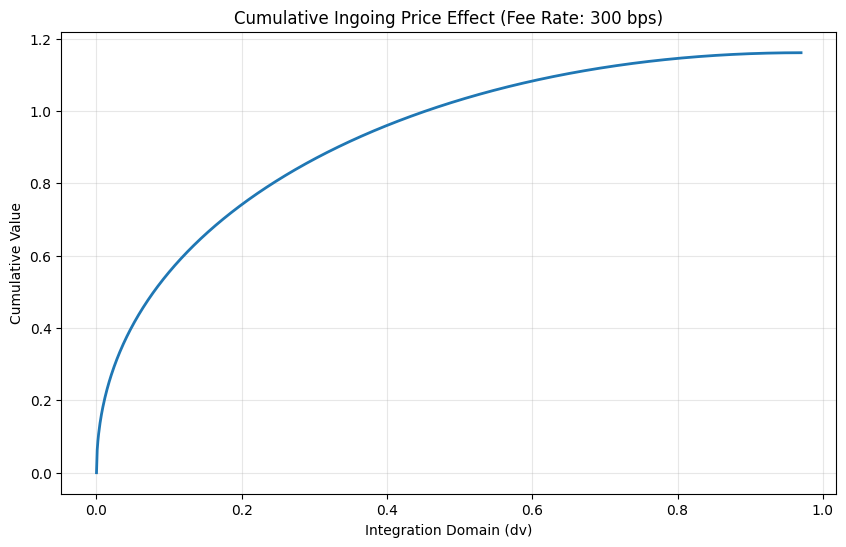

Plotting outgoing price effect cumulative...


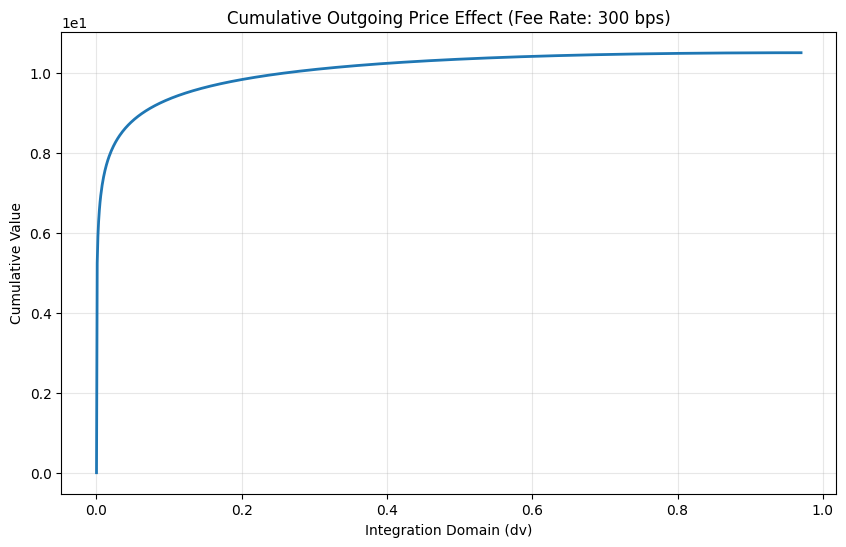

In [5]:
# Cell 5
analyzer.plot_price_effect_cumulative(is_ingoing=True)
analyzer.plot_price_effect_cumulative(is_ingoing=False)

### 2.2 Distribution Effects
Analyzing the impact of log-normal price distribution on vega.

**Log-normal PDF** ($\phi(v)$):


Plotting ingoing cumulative effect analysis...


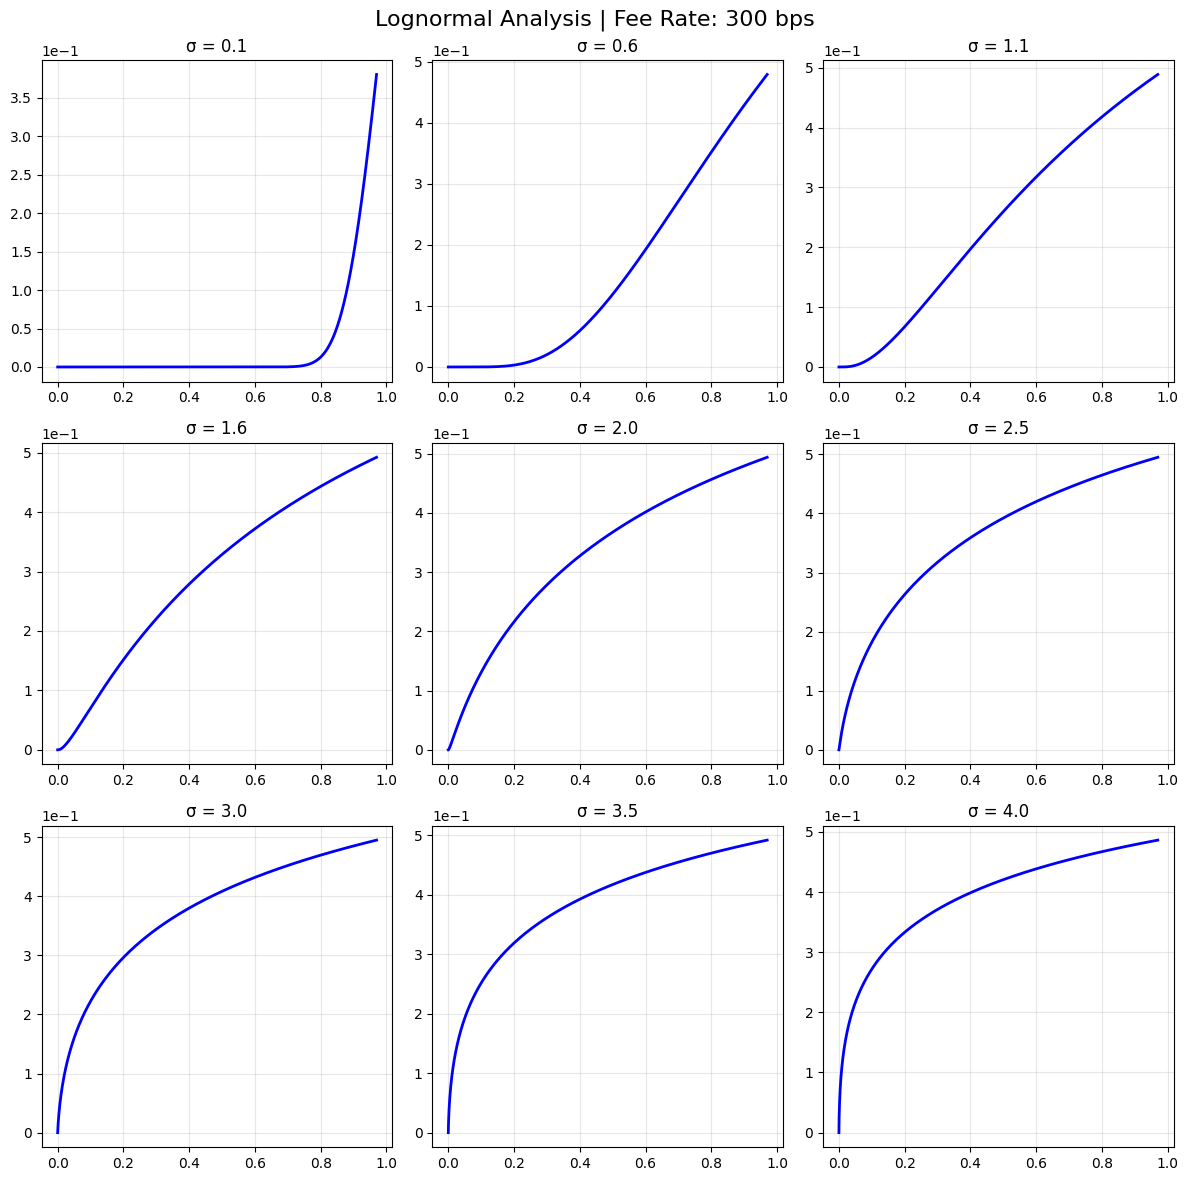

In [12]:
# Cell 6
import numpy as np

sigmas = np.linspace(0.1, 4.0, 9)
analyzer.plot_cumulative_effect(sigmas, 'lognormal')

### 2.3 Sensitivity Analysis
Understanding the direct volatility sensitivity component.

**Sensitivity Term** ($\frac{(\ln v)^2}{\sigma^3} - \frac{1}{\sigma}$):

Plotting ingoing cumulative effect analysis...


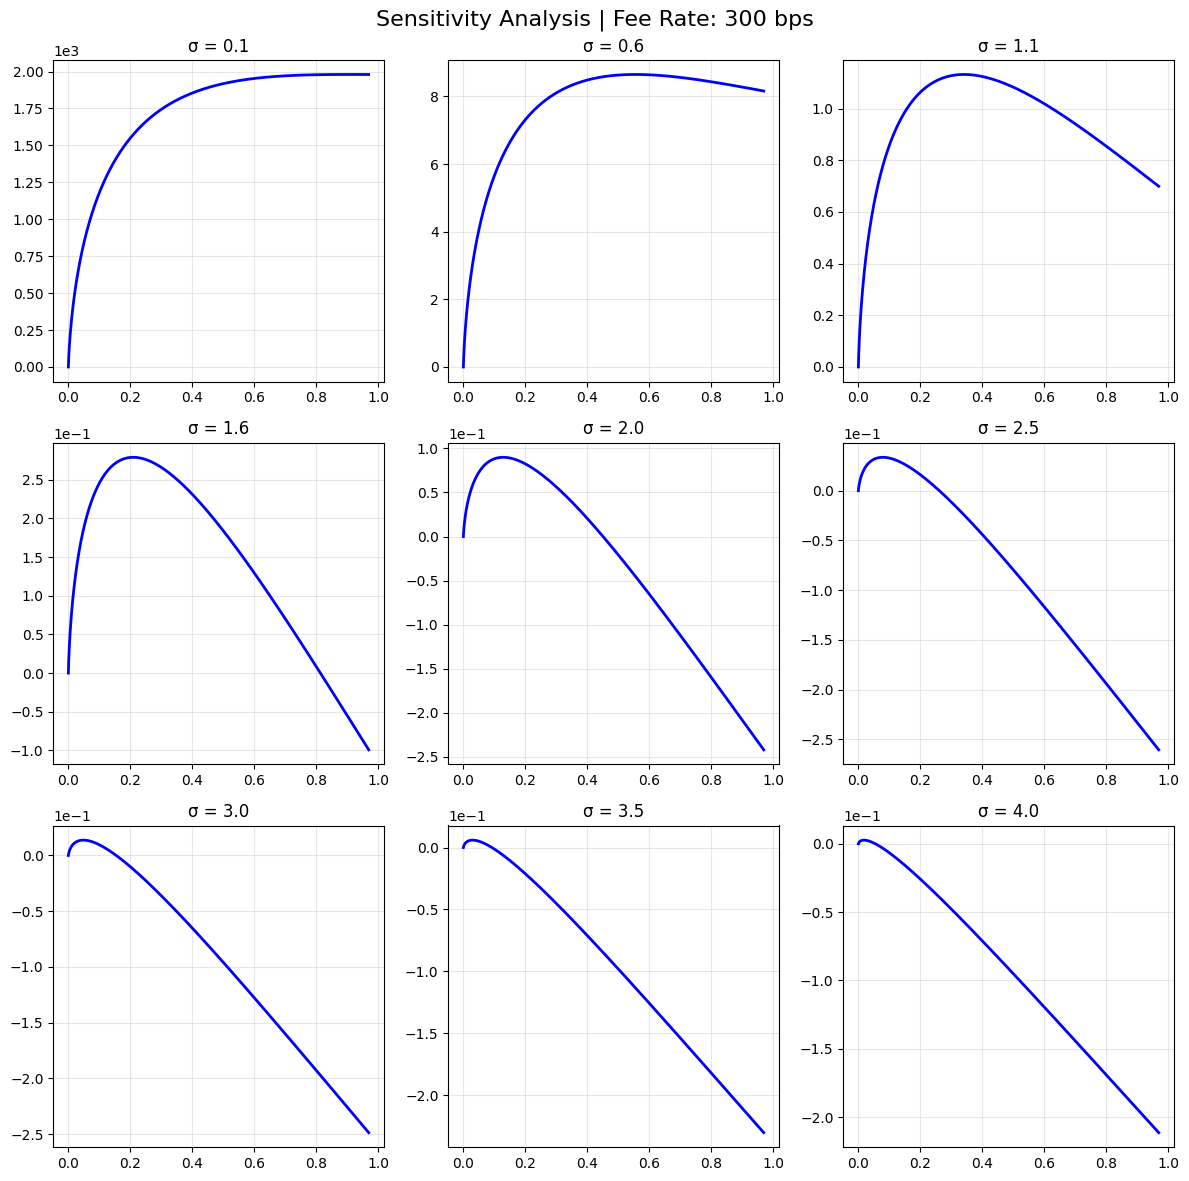

In [7]:
# Cell 7
analyzer.plot_cumulative_effect(sigmas, 'sensitivity')

### 2.4 Weighted Sensitivity Analysis
Examining the combined effect of distribution and sensitivity.

**Weighted Sensitivity**:
    - Combination of log-normal PDF and sensitivity term
    - Given by $\phi(v) \cdot \left(\frac{(\ln v)^2}{\sigma^3} - \frac{1}{\sigma} \right)$

Plotting ingoing cumulative effect analysis...


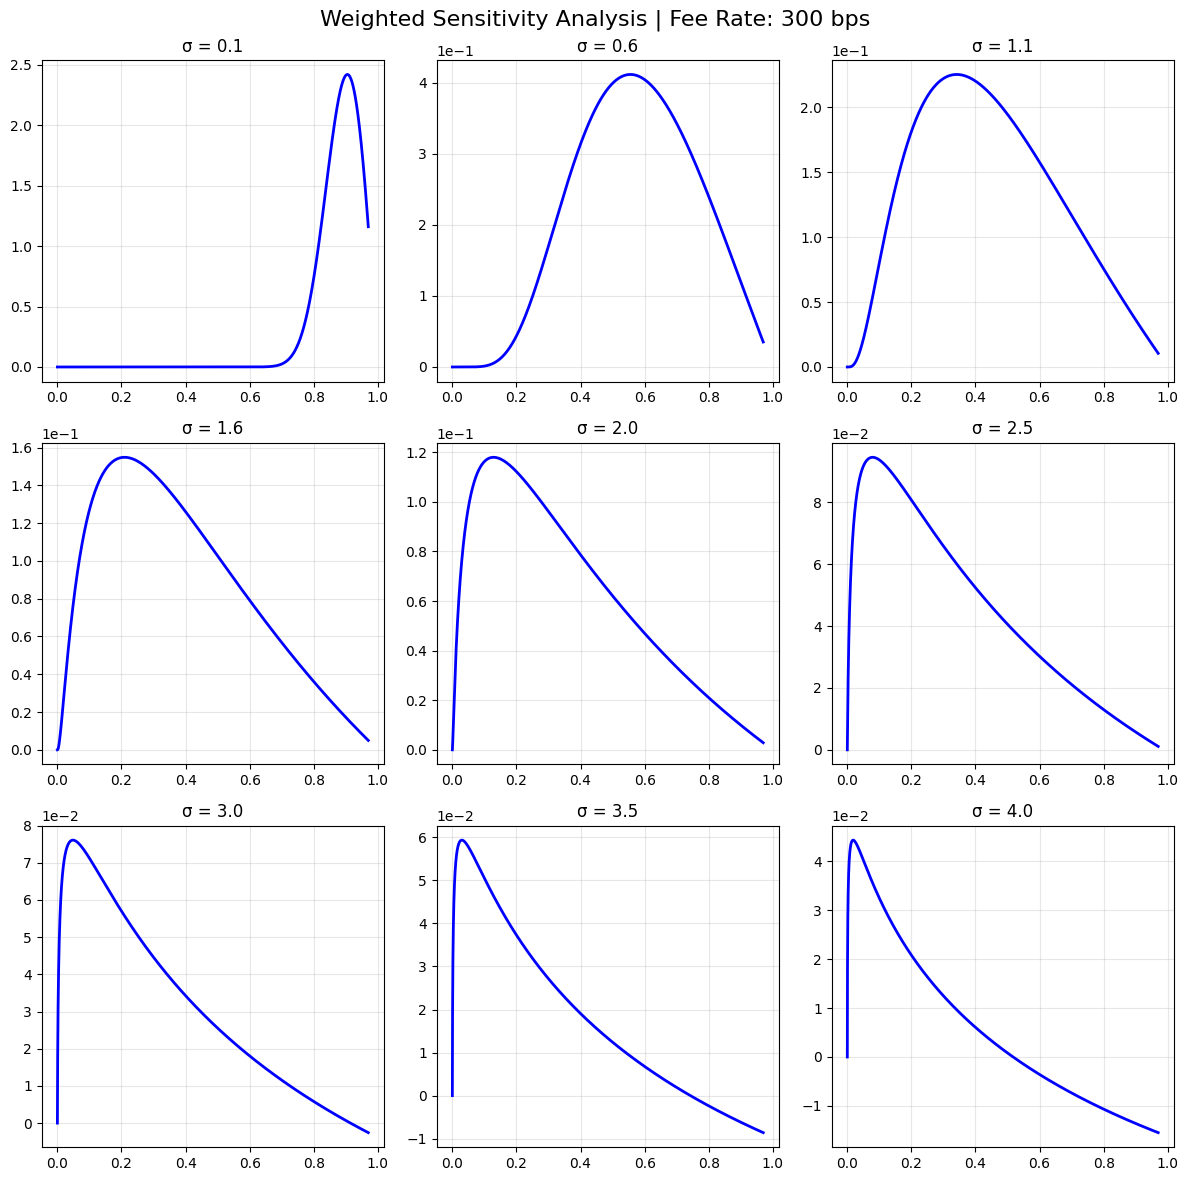

In [8]:
# Cell 8
analyzer.plot_cumulative_effect(sigmas, 'weighted_sensitivity')

### 2.5 Overall Component Integration
Analyzing how all components combine to create the final vega effect.

Plotting ingoing cumulative effect analysis...


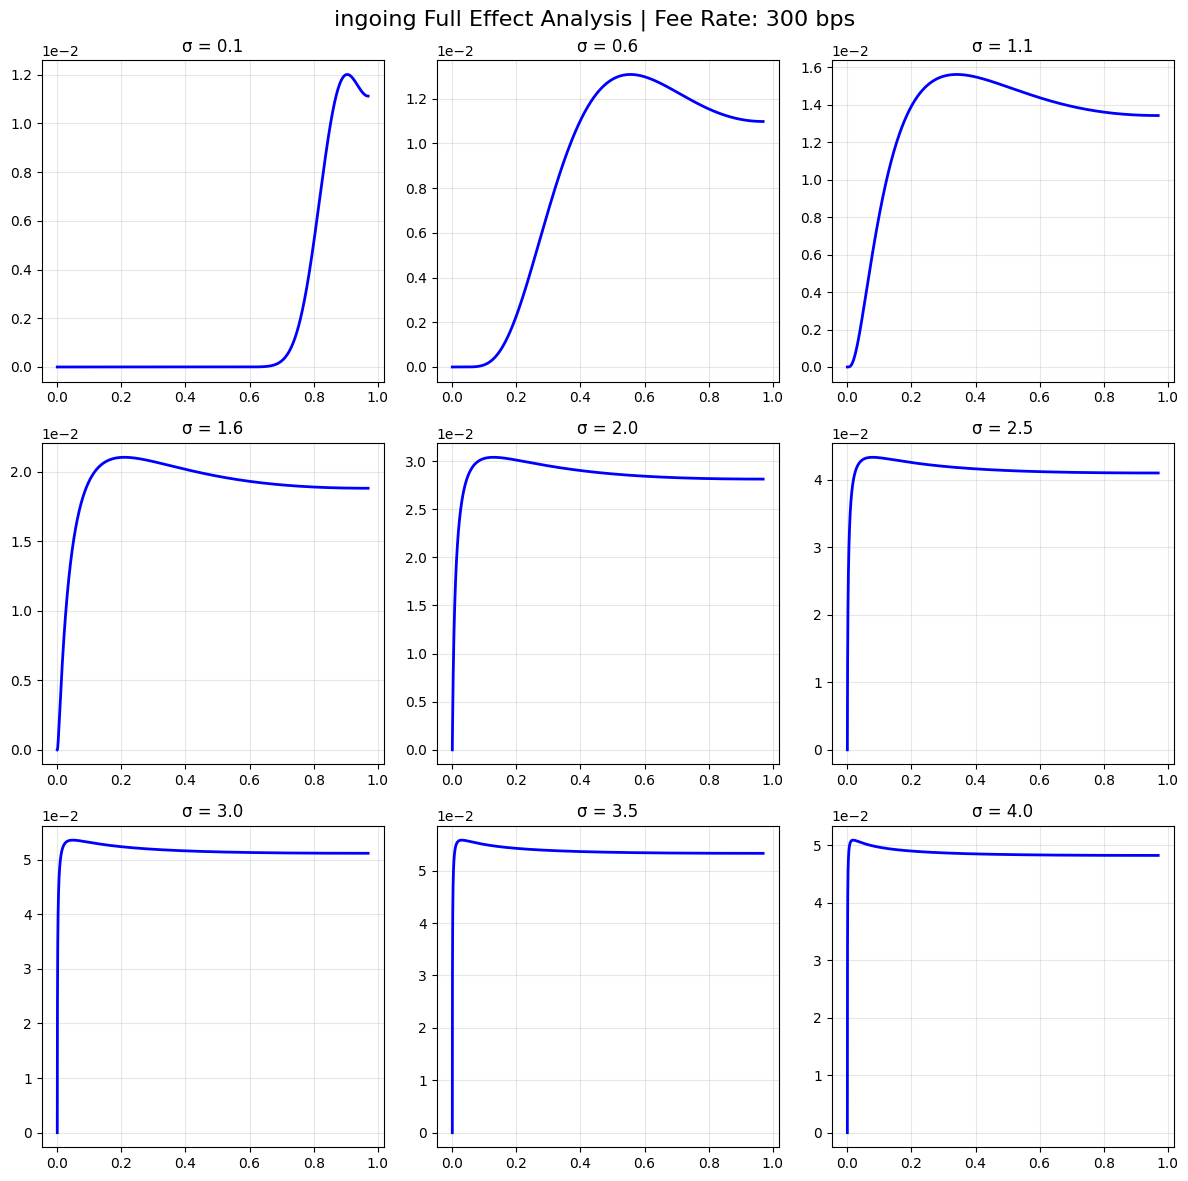

Plotting outgoing cumulative effect analysis...


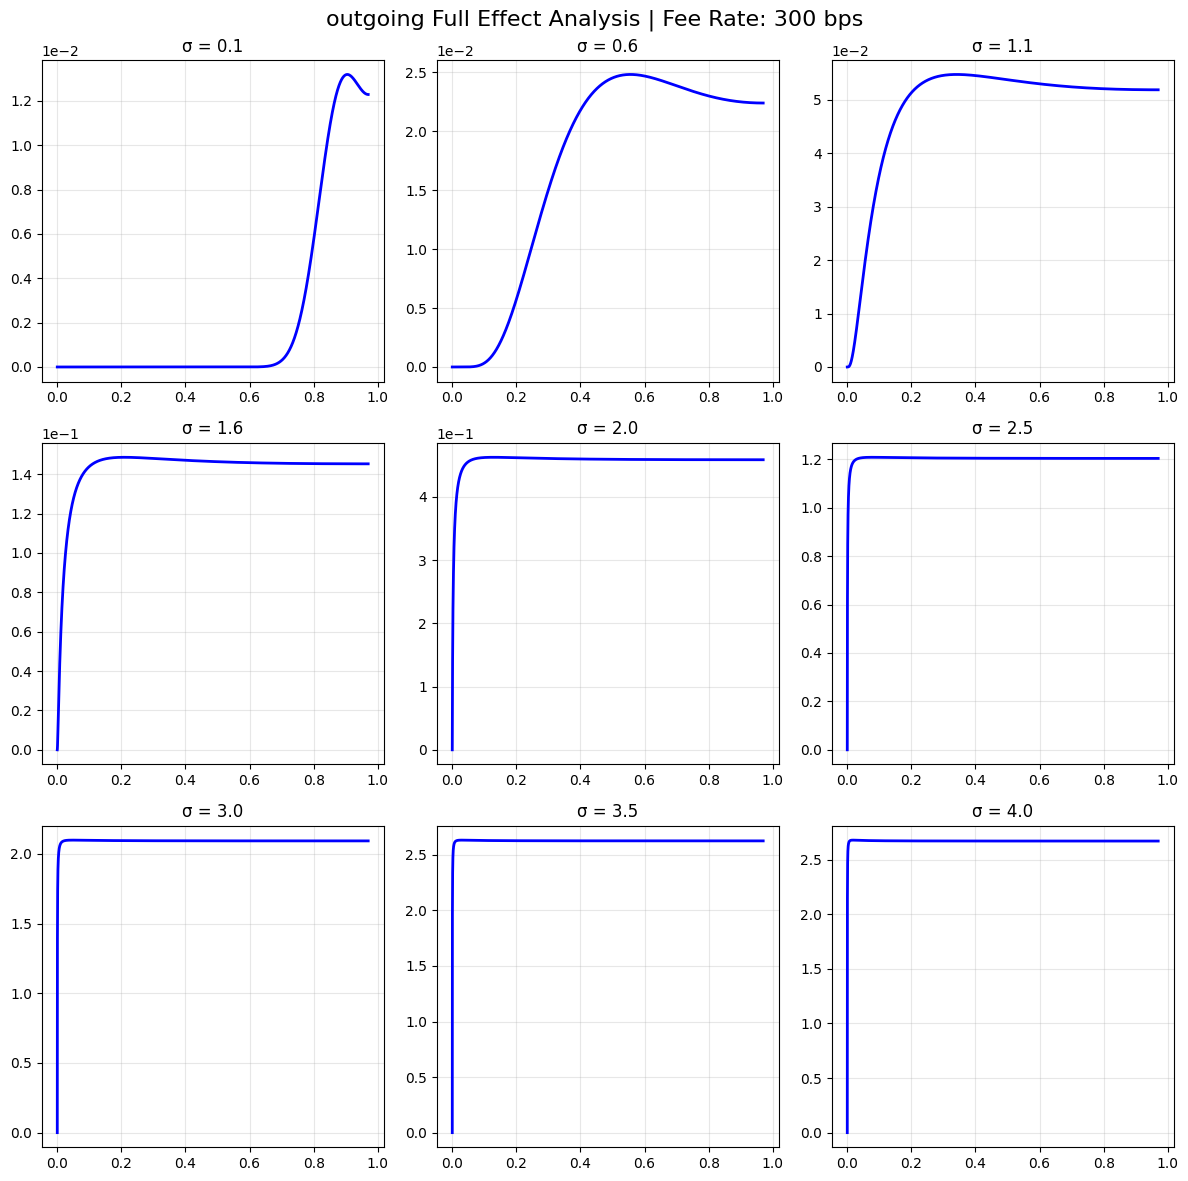

In [9]:
# Cell 9
analyzer.plot_cumulative_effect(sigmas, 'full', is_ingoing=True)
analyzer.plot_cumulative_effect(sigmas, 'full', is_ingoing=False)

## 3. Comparative Analysis
Comparing the relative contributions of different components to vega.

Plotting ingoing cumulative comparison analysis...


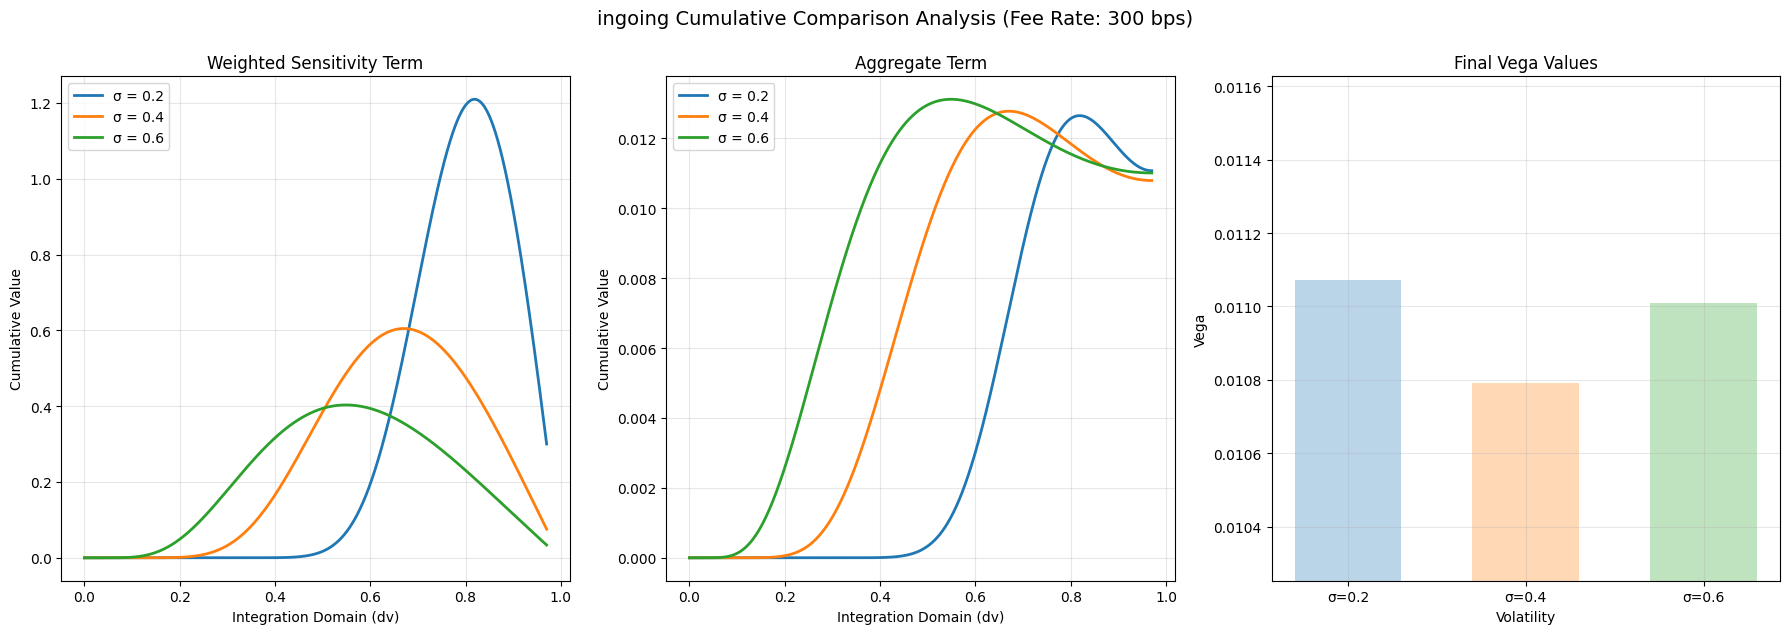

Plotting outgoing cumulative comparison analysis...


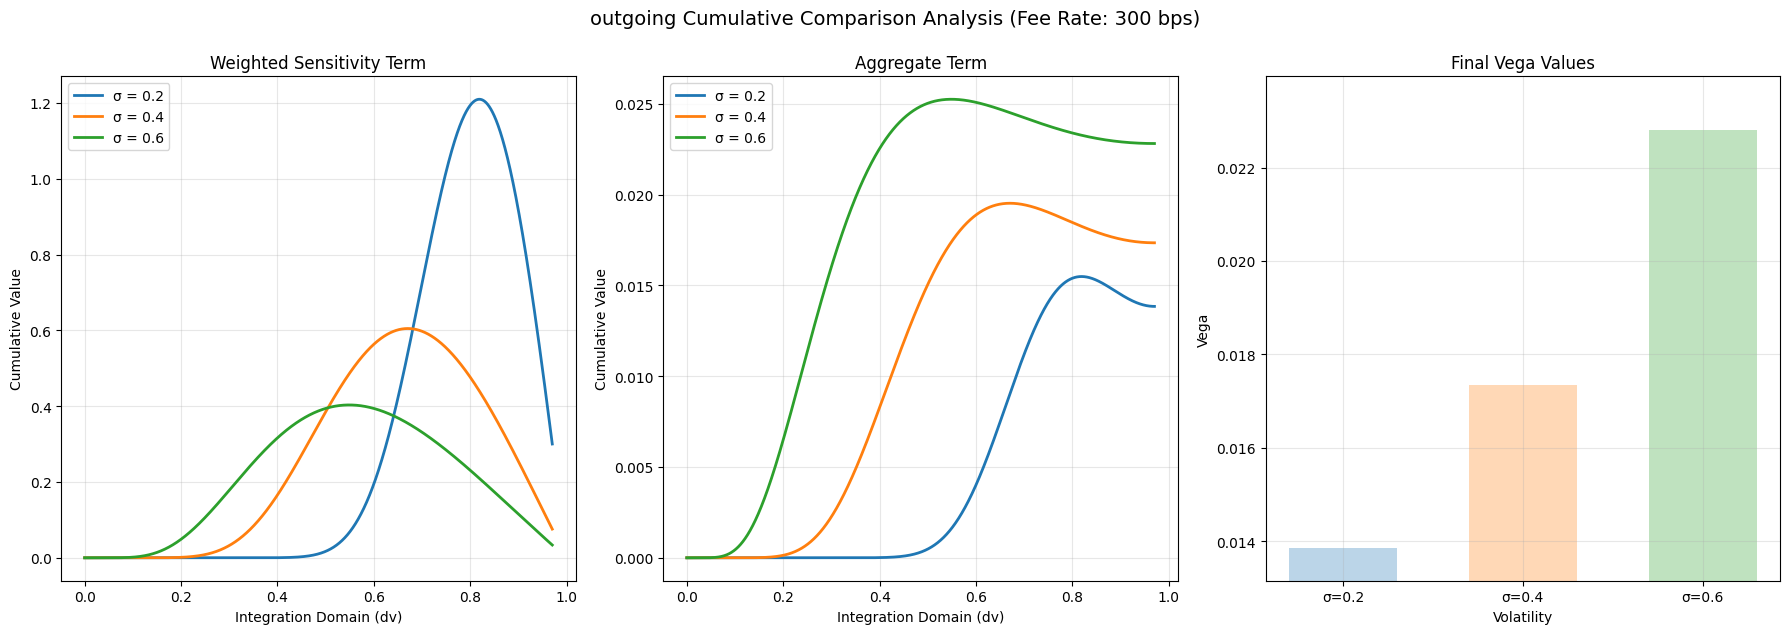

In [10]:
# Cell 10
analyzer.plot_cumulative_comparison_analysis(is_ingoing=True)
analyzer.plot_cumulative_comparison_analysis(is_ingoing=False)

## 4. Fee Rate Sensitivity
Understanding how vega changes with different fee rates.

Plotting ingoing vega vs fee rate...


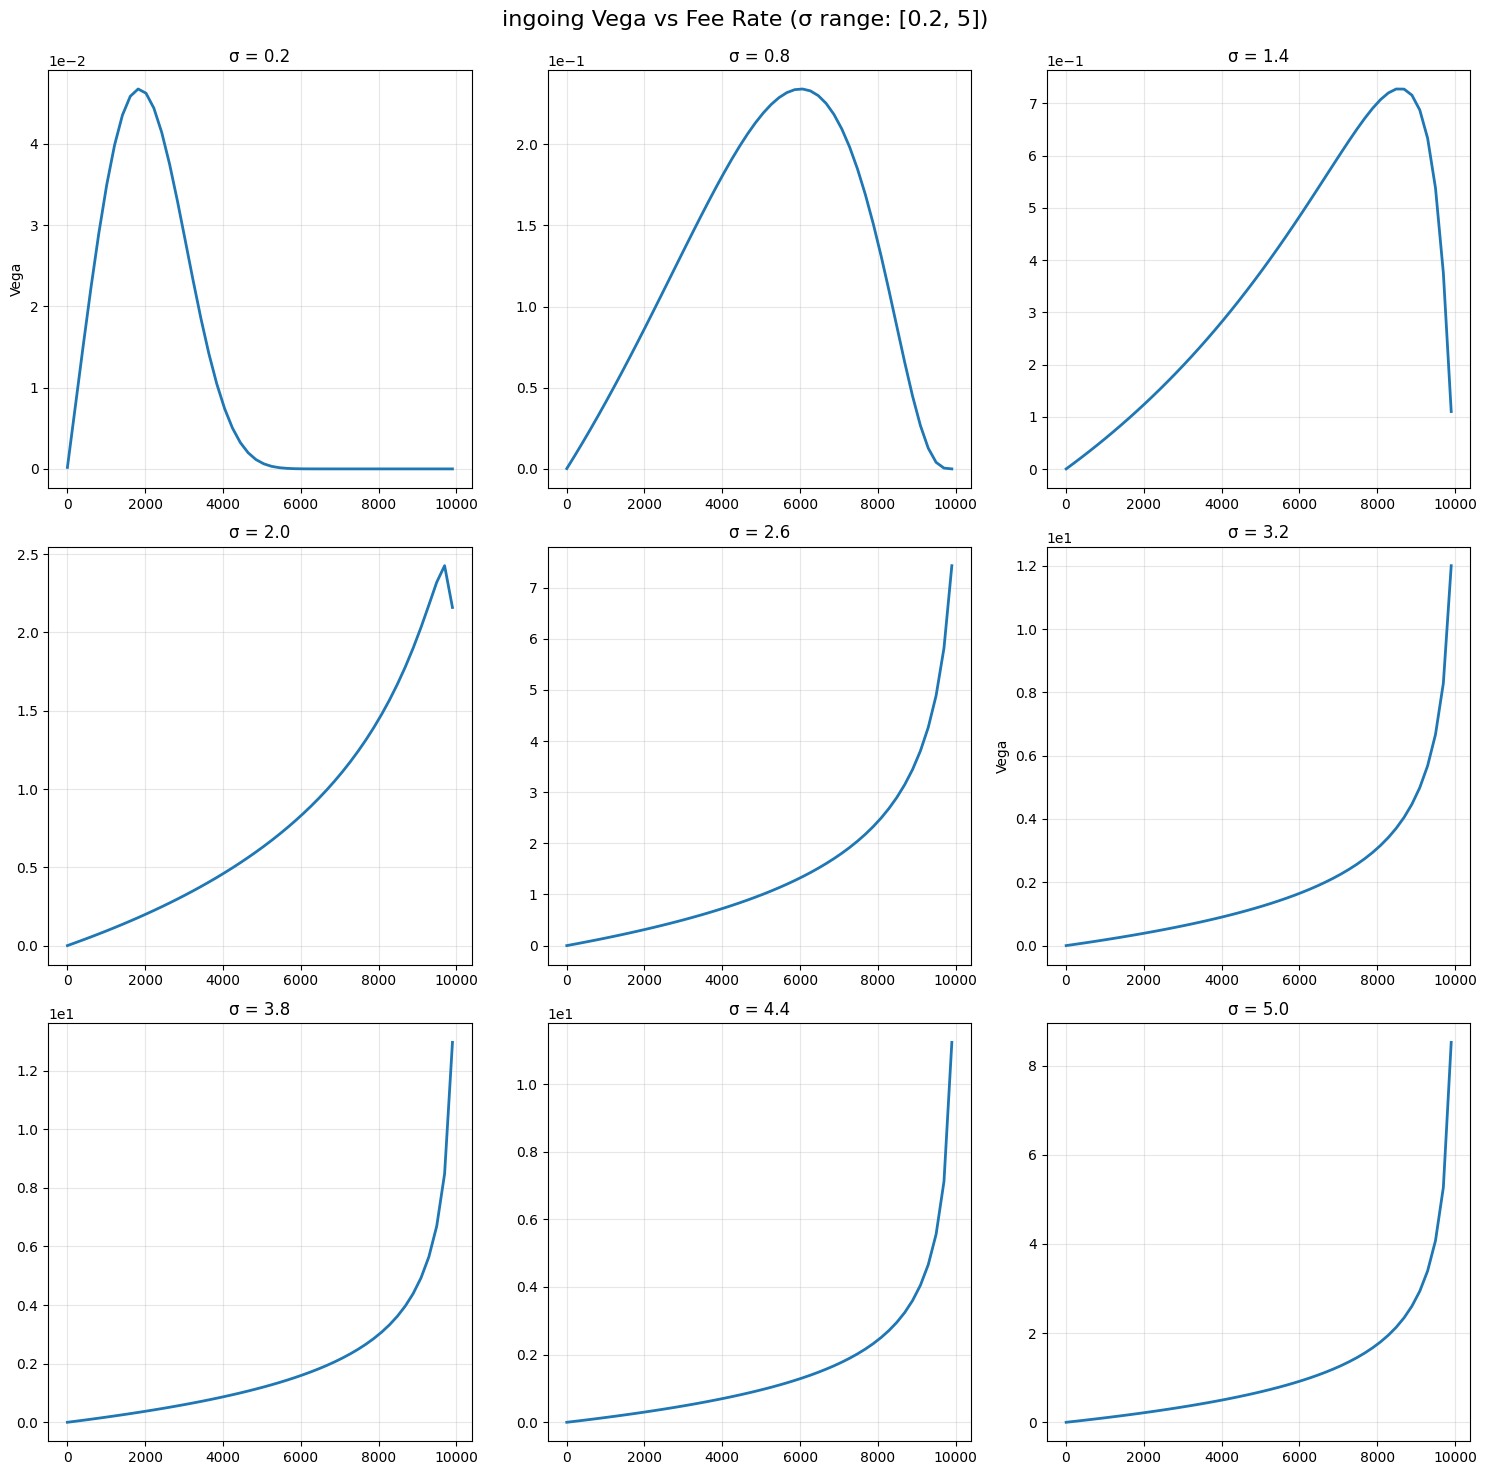

Plotting outgoing vega vs fee rate...


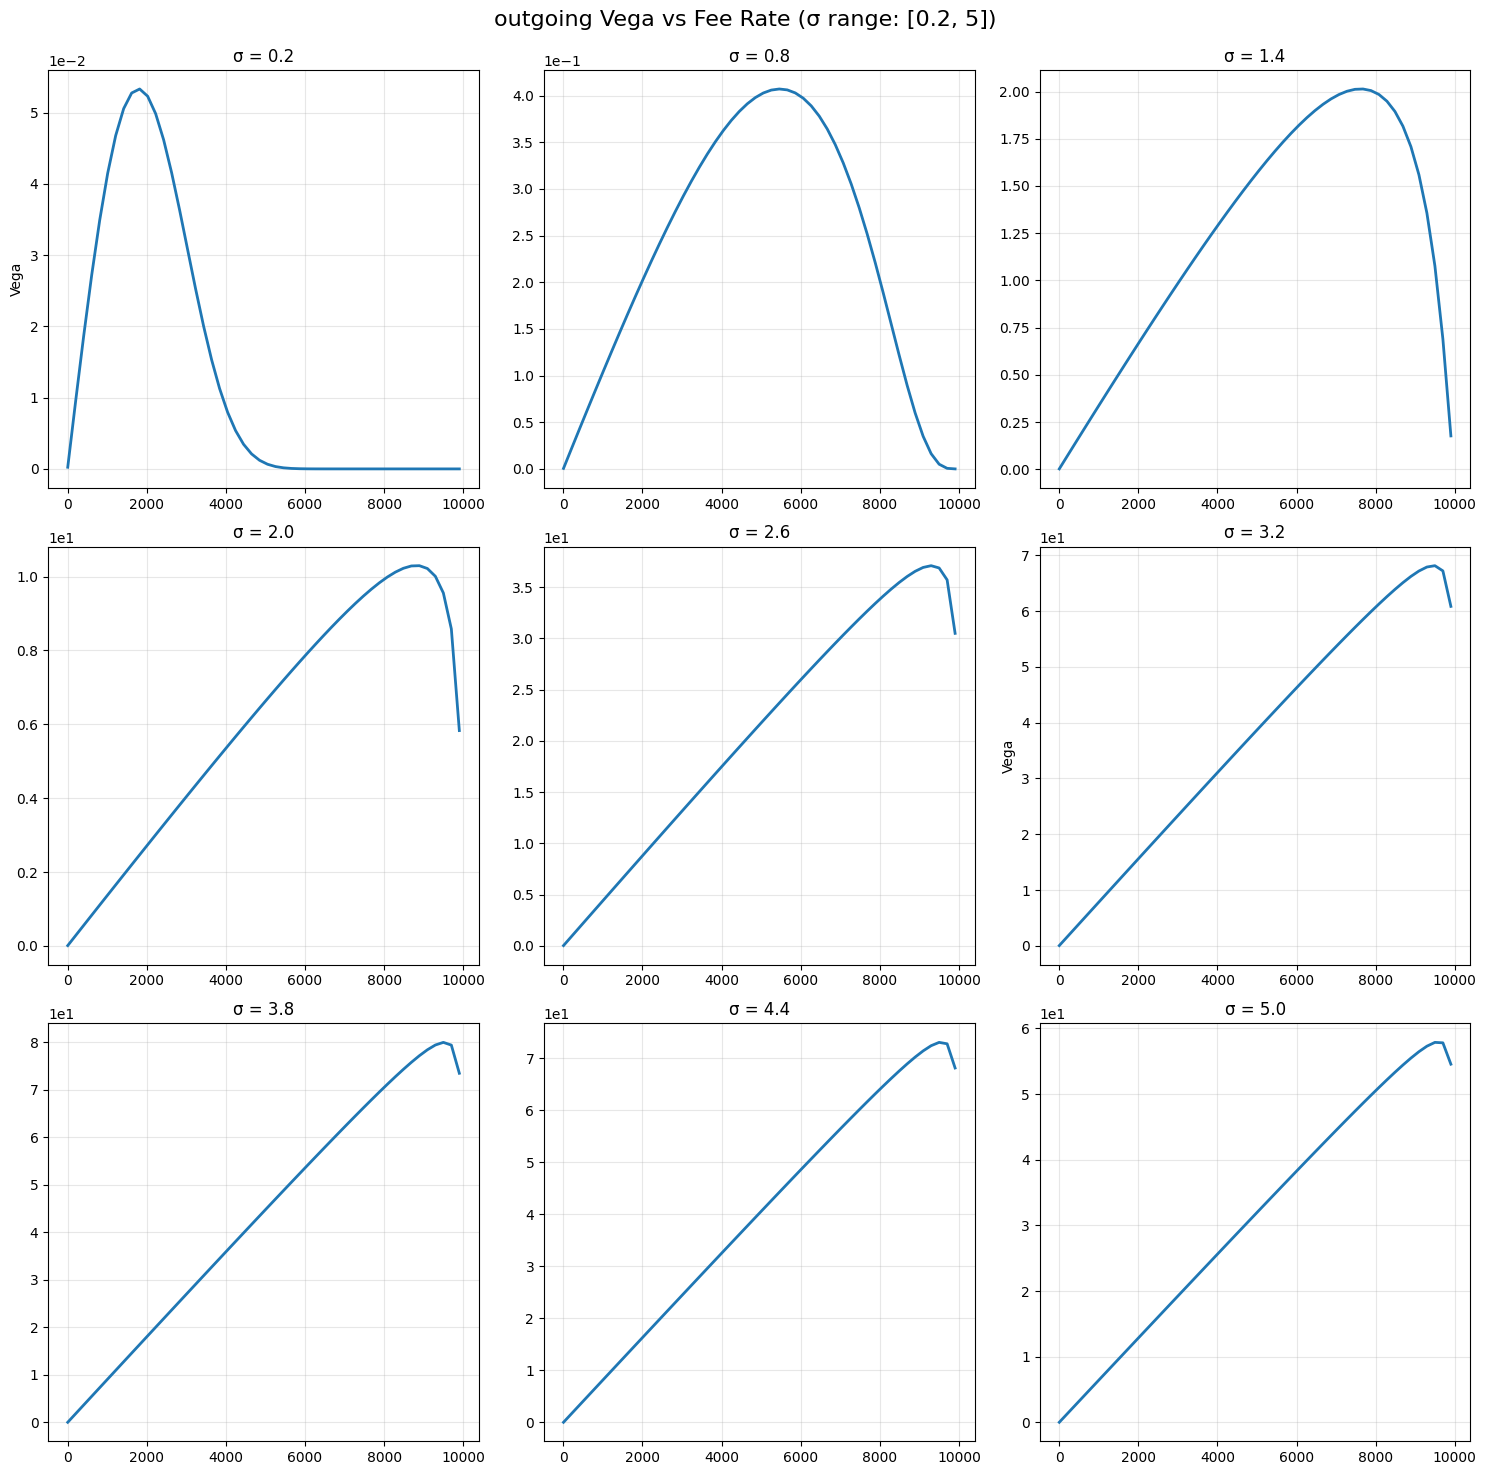

In [11]:
# Cell 11
analyzer.plot_vega_vs_fee(is_ingoing=True)
analyzer.plot_vega_vs_fee(is_ingoing=False)